<>:38: SyntaxWarning: invalid escape sequence '\h'
<>:38: SyntaxWarning: invalid escape sequence '\h'
C:\Users\Admin\AppData\Local\Temp\ipykernel_2288\3493414809.py:38: SyntaxWarning: invalid escape sequence '\h'
  label=f'Fitted PDF: $\hat{{p}}(z)$')
C:\Users\Admin\AppData\Local\Temp\ipykernel_2288\3493414809.py:7: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data.csv',encoding='latin1')
C:\Users\Admin\AppData\Local\Temp\ipykernel_2288\3493414809.py:21: RuntimeWarning: overflow encountered in exp
  return c * np.exp(-lambd * (z_val - mu)**2)


Learned Parameters:
c = 0.02610997949865131
lambda = 0.0018764106667276252
mu = 19.423434512082626


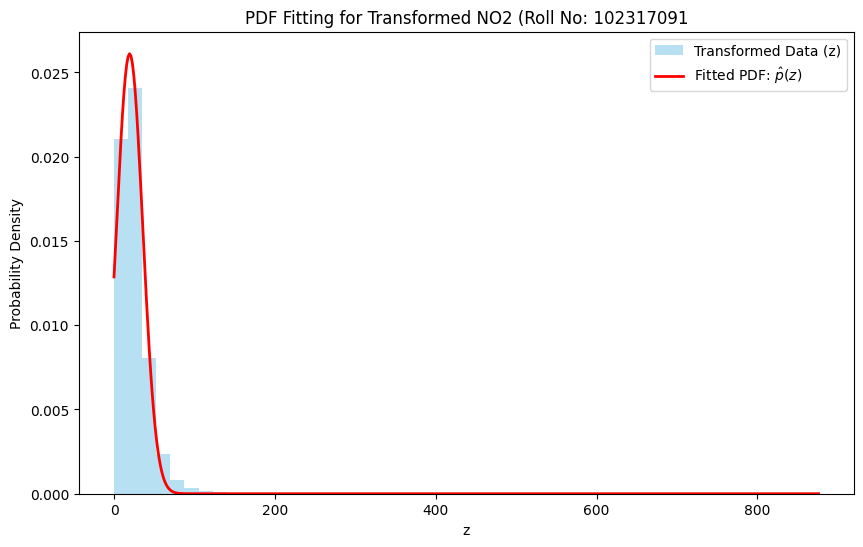

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

r = 102317091  
df = pd.read_csv('data.csv',encoding='latin1')

# Pre-processing: Remove NaN from NO2 and treat it as 'x'
x = df['no2'].dropna().values

ar = 0.05 * (r % 7)
br = 0.3 * (r % 5 + 1)

z = x + ar * np.sin(br * x)

counts, bin_edges = np.histogram(z, bins=50, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

def pdf_model(z_val, c, lambd, mu):
    return c * np.exp(-lambd * (z_val - mu)**2)

initial_guess = [max(counts), 0.01, np.mean(z)]

# Perform the curve fitting 
params, covariance = curve_fit(pdf_model, bin_centers, counts, p0=initial_guess)
c_fit, lambda_fit, mu_fit = params

print(f"Learned Parameters:\nc = {c_fit}\nlambda = {lambda_fit}\nmu = {mu_fit}")

#VISUALIZATION 
plt.figure(figsize=(10, 6))
plt.hist(z, bins=50, density=True, alpha=0.6, color='skyblue', label='Transformed Data (z)')

# Generate points for the fitted curve
z_range = np.linspace(min(z), max(z), 500)
plt.plot(z_range, pdf_model(z_range, *params), 'r-', lw=2, 
         label=f'Fitted PDF: $\hat{{p}}(z)$')

plt.title(f'PDF Fitting for Transformed NO2 (Roll No: 102317091')
plt.xlabel('z')
plt.ylabel('Probability Density')
plt.legend()
plt.show()